<a href="https://colab.research.google.com/github/sowkyak/MINI-PROJECT/blob/main/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

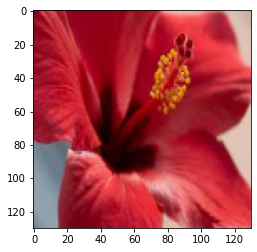

In [2]:
# Preprocessing
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize

datadir = '/content/drive/MyDrive/data'
categories = ['aeroplanes','animals','flowers']
target = []
flat_data = []
images = []

for category in categories:
  class_num = categories.index(category)
  path = os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(130,130,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)
plt.imshow(img_resized)
plt.show()

16900

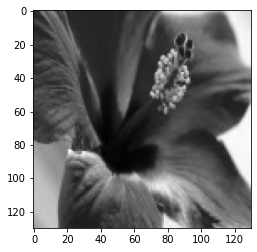

In [3]:
from skimage.color import rgb2gray
img_resized = resize(img_array,(130,130))
img_gray = rgb2gray(img_resized)
plt.imshow(img_gray,cmap='gray')
img_gray.size

<BarContainer object of 3 artists>

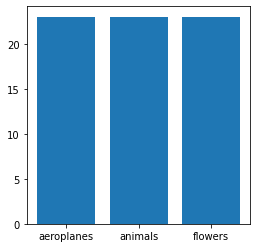

In [31]:
unique,count = np.unique(target,return_counts=True)
plt.rcParams["figure.figsize"]=(4,4)
plt.bar(categories,count)

In [32]:
df =pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50661,50662,50663,50664,50665,50666,50667,50668,50669,50670,50671,50672,50673,50674,50675,50676,50677,50678,50679,50680,50681,50682,50683,50684,50685,50686,50687,50688,50689,50690,50691,50692,50693,50694,50695,50696,50697,50698,50699,Target
0,0.003922,0.497255,0.825098,0.003922,0.497255,0.825098,0.007843,0.501176,0.829020,0.007843,0.501176,0.829020,0.004706,0.498039,0.822745,0.008627,0.501961,0.826667,0.012549,0.505882,0.830588,0.007481,0.503288,0.825098,0.003922,0.503047,0.822516,0.004706,0.504314,0.827511,0.006986,0.504314,0.835897,0.005852,0.499608,0.838504,0.010317,0.499608,0.844042,0.016760,...,0.654902,0.768627,0.886275,0.658824,0.768627,0.886275,0.662745,0.768627,0.886275,0.663469,0.769351,0.886998,0.666667,0.772549,0.890196,0.666667,0.772549,0.890196,0.666667,0.772549,0.890196,0.666667,0.772549,0.890196,0.666667,0.772549,0.890196,0.666667,0.772549,0.890196,0.666667,0.772549,0.890196,0.666667,0.772549,0.890196,0.666667,0.772549,0.890196,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
2,0.196524,0.310250,0.538054,0.196878,0.310603,0.540156,0.200630,0.314356,0.541807,0.204644,0.318370,0.545821,0.208703,0.322428,0.549879,0.212564,0.325598,0.553049,0.215686,0.327070,0.554721,0.217919,0.331352,0.560784,0.223529,0.335634,0.563469,0.226190,0.339916,0.567367,0.230241,0.343967,0.571418,0.235415,0.349140,0.576591,0.239969,0.353694,0.581145,0.243937,...,0.268265,0.276109,0.436893,0.267466,0.272187,0.432971,0.267466,0.272187,0.432971,0.269526,0.276109,0.436893,0.289494,0.283152,0.440015,0.294118,0.283952,0.440814,0.294118,0.283952,0.440814,0.290995,0.283152,0.440015,0.287074,0.279231,0.436094,0.287374,0.278431,0.435294,0.290196,0.281554,0.438416,0.294862,0.277969,0.433549,0.299774,0.270588,0.421795,0
3,0.721569,0.623529,0.596078,0.717647,0.619608,0.592157,0.717647,0.619608,0.592157,0.717647,0.619608,0.592157,0.713725,0.619608,0.592157,0.713725,0.619608,0.596078,0.709804,0.619608,0.596078,0.709804,0.619608,0.596078,0.709804,0.619608,0.596078,0.709804,0.619608,0.596078,0.709804,0.619608,0.596078,0.711463,0.621267,0.592157,0.713725,0.623529,0.592157,0.713725,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
4,0.850980,0.823529,0.713725,0.847059,0.819608,0.709804,0.843816,0.816365,0.706561,0.843137,0.815686,0.705882,0.845400,0.817949,0.708145,0.857466,0.830015,0.720211,0.864253,0.836802,0.726998,0.873670,0.846219,0.736415,0.881750,0.853469,0.743665,0.902323,0.843733,0.716803,0.907315,0.843137,0.715158,0.907315,0.843137,0.715158,0.907315,0.843137,0.715158,0.907315,...,0.159921,0.167765,0.156000,0.162217,0.170060,0.158296,0.161749,0.169592,0.157827,0.156863,0.164706,0.152941,0.156863,0.164706,0.152941,0.158899,0.166742,0.154977,0.161143,0.168986,0.157221,0.163253,0.171096,0.159331,0.162899,0.170742,0.158977,0.151162,0.159005,0.147240,0.145529,0.153372,0.141607,0.151131,0.158974,0.147210,0.146917,0.154760,0.146154,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [38]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=109)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
y_pred = clf.predict(x_test)
y_pred
                     

array([1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1])

In [42]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [48]:
accuracy_score(y_pred,y_test)

0.5714285714285714

In [49]:
confusion_matrix(y_pred,y_test)

array([[3, 0, 0],
       [3, 7, 3],
       [2, 1, 2]])

In [51]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [52]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBPiYfKQf-MX2gz-lOqXeolaWm0oOZZahrXg&usqp=CAU
(183, 275, 3)
PREDICTED OUTPUT :animals


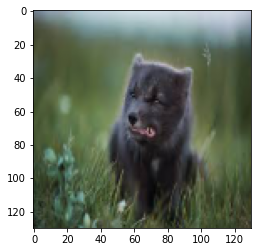

In [62]:
# Testing the model
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(130,130,3))
flat_data.append(img_resized.flatten())
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'PREDICTED OUTPUT :{y_out}')